<a href="https://www.kaggle.com/code/dascient/un-oracle-nigmatique?scriptVersionId=216041226" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Un Oracle Énigmatique
## A Debatably Profitable Autonomous Tradable Robotical Solvant, I mean Solution..,m

The code above integrates a Kalman Filter-based trend estimation to generate autonomous tradinğ signals for any åsset, including çryptocurrencies.

In [10]:
from IPython.display import clear_output
!pip install pykalman
!pip install yfinance
clear_output()

In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Function to fetch historical data
def fetch_data(ticker, start_date, end_date):
    print("Summoning the market's whispers...")
    data = yf.download(ticker, start=start_date, end=end_date)
    data = pd.read_csv('https://www.cryptodatadownload.com/cdd/Binance_SHIBUSDT_1h.csv',header=1)
    data = data.tail(300)
    data['Return'] = data['Close'].pct_change()
    return data

# Kalman Filter for trend estimation
def kalman_filter(prices):
    print("Unraveling the veils of uncertainty...")
    kf = KalmanFilter(transition_matrices=[1], observation_matrices=[1],
                      initial_state_mean=prices[0], n_dim_obs=1)
    state_means, _ = kf.filter(prices)
    return state_means

# Trading signals based on Kalman Filter trend
def generate_signals(data):
    print("Deciphering cryptic signals...")
    trend = kalman_filter(data['Close'].values)
    data['Trend'] = trend
    data['Signal'] = 0
    data.loc[data['Close'] > data['Trend'], 'Signal'] = 1  # Buy
    data.loc[data['Close'] < data['Trend'], 'Signal'] = -1  # Sell
    return data

# Backtest the strategy
def backtest(data, initial_capital):
    print("Traversing the labyrinth of profits...")
    data['Portfolio'] = initial_capital
    for i in range(1, len(data)):
        data.loc[data.index[i], 'Portfolio'] = (
            data['Portfolio'].iloc[i - 1] * (1 + data['Return'].iloc[i])
            if data['Signal'].iloc[i - 1] == 1 else data['Portfolio'].iloc[i - 1]
        )
    return data

# Visualization
def plot_results(data, ticker):
    print("Revealing the hidden patterns...")
    plt.figure(figsize=(24, 7))
    plt.plot(data['Close'], label='Price', alpha=0.666)
    plt.plot(data['Trend'], label='Kalman Trend', linestyle='--')
    plt.scatter(data.index, data['Close'][data['Signal'] == 1], label='Buy Signal', marker='^', color='green')
    plt.scatter(data.index, data['Close'][data['Signal'] == -1], label='Sell Signal', marker='v', color='red')
    plt.title(f"{ticker} - Autonomous Trading Signals")
    plt.legend()
    plt.show()

# Main function
def main():
    ticker = "SHIB-USD"  # Choose your asset
    start_date = "2024-06-01"
    end_date = "2025-01-01"
    initial_capital = 10000

    print("Awakening the algorithmic sage...")
    data = fetch_data(ticker, start_date, end_date)
    data = generate_signals(data)
    data = backtest(data, initial_capital)

    print(f"Final Portfolio Value: ${data['Portfolio'].iloc[-1]:.2f}")
    plot_results(data, ticker)

[*********************100%***********************]  1 of 1 completed

Awakening the algorithmic sage...
Summoning the market's whispers...


Deciphering cryptic signals...
Unraveling the veils of uncertainty...
Traversing the labyrinth of profits...
Final Portfolio Value: $16464.16
Revealing the hidden patterns...


ValueError: x and y must be the same size

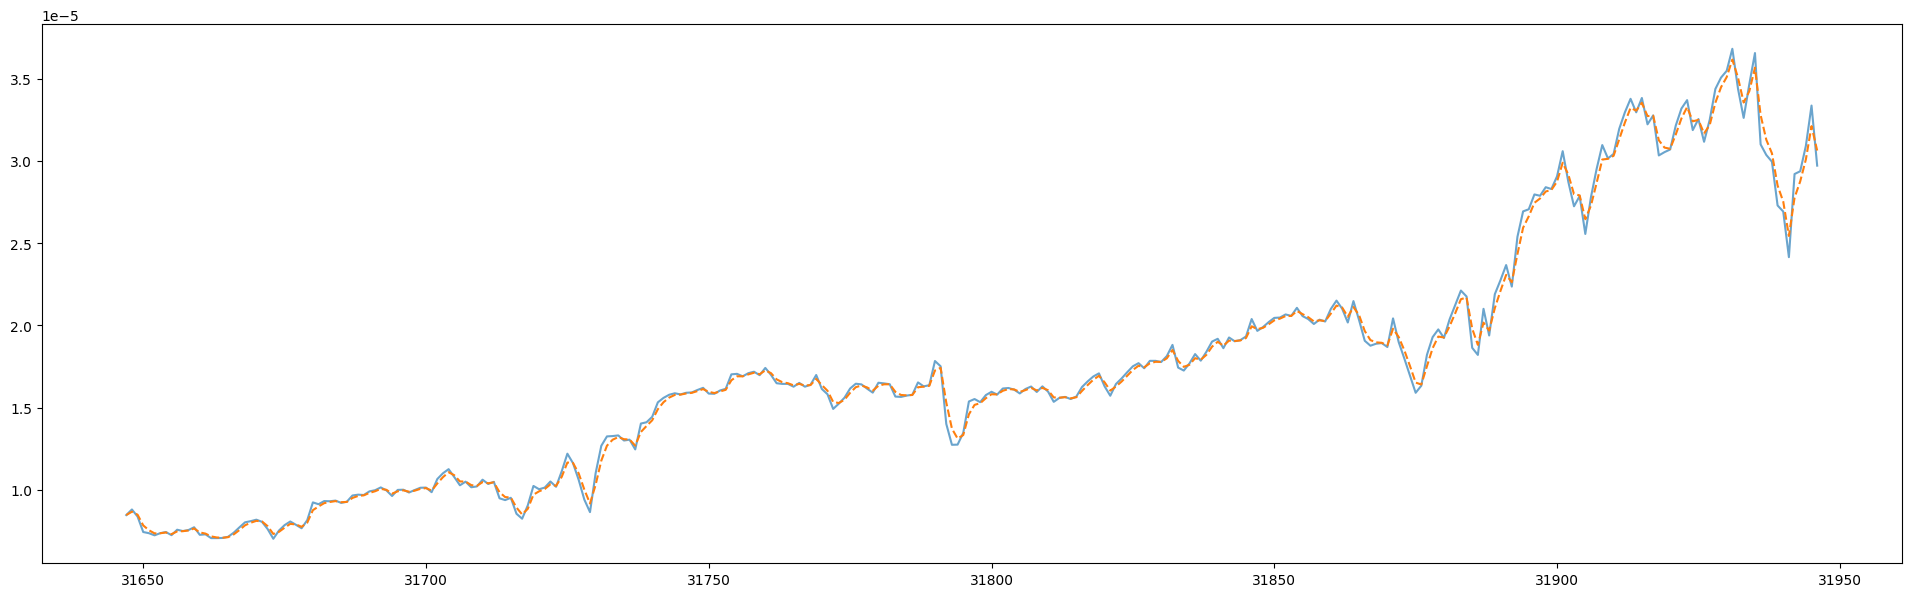

In [21]:
import warnings
warnings.filterwarnings("ignore")

main()

In [ ]:
# en fin, din-din, ma tin mints, & cools goons balloons ain't for fools init, gov'nah!